### Image Quantization

Normal RGB image representation (with 8 bit depth per channel) yields more than 16 millions combinations (different colours). Is that many really necessary? Let's have a look.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

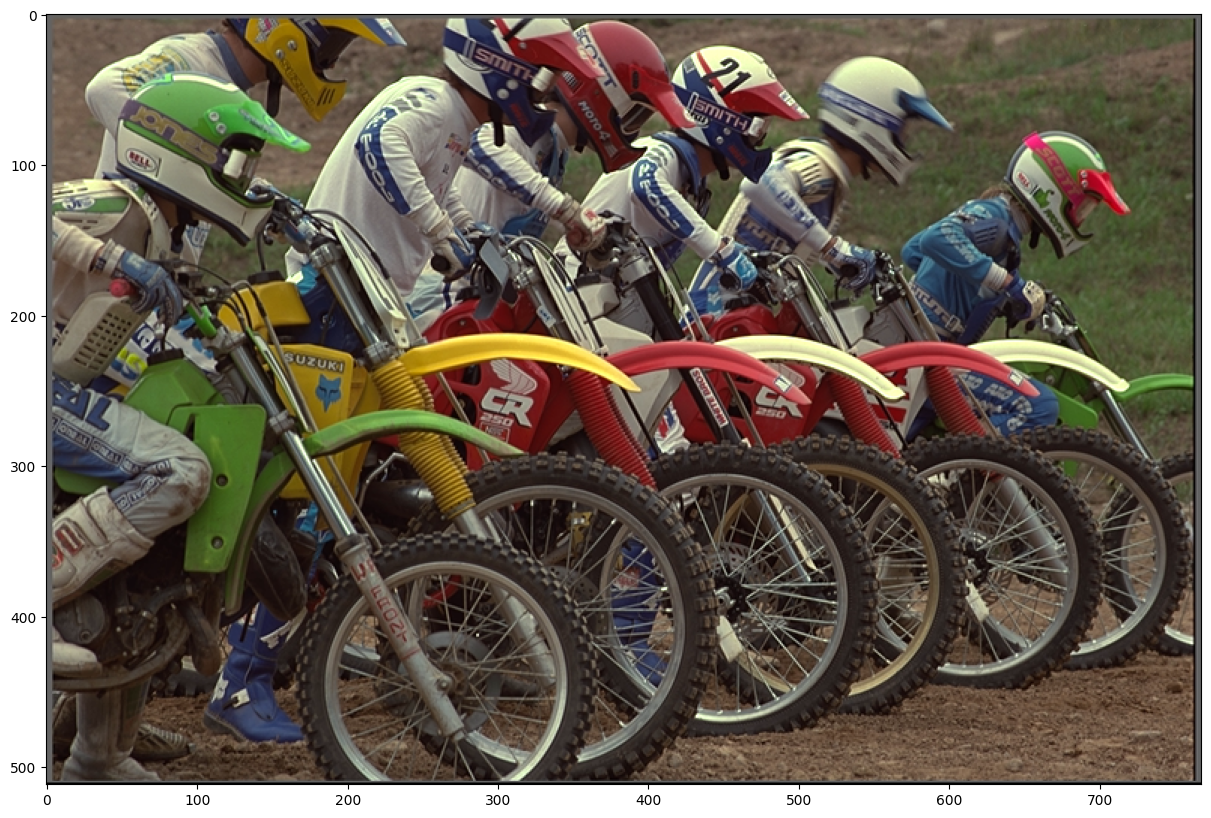

In [2]:
img = cv2.imread('data/kodim05.png') # kodim02
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Let us now count the different colours in the picture.

In [3]:
from tqdm import tqdm

rows, cols, channels = img.shape
colors = []

for r in tqdm(range(rows)):
    for c in range(cols):
        pixel = list(img[r, c, :])
        if pixel not in colors:
            colors.append(pixel)
            
print(rows*cols, len(colors))

100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [03:51<00:00,  2.22it/s]


NameError: name 'color' is not defined

In [4]:
# Let's count the different colours in a celever way :-)
pixels = np.reshape(img, (-1, 3))
pixels = [tuple(p) for p in pixels]
print('Number of pixels', rows*cols, len(pixels))

Number of pixels 393216 393216


In [5]:
from collections import Counter
colors = Counter(pixels)
colors

Counter({(99, 99, 99): 2968,
         (34, 24, 22): 874,
         (35, 25, 24): 851,
         (0, 0, 0): 768,
         (37, 27, 25): 733,
         (33, 23, 21): 705,
         (44, 37, 34): 704,
         (46, 39, 36): 701,
         (38, 28, 26): 672,
         (47, 40, 37): 658,
         (97, 97, 97): 634,
         (43, 36, 33): 615,
         (42, 35, 32): 598,
         (39, 30, 28): 593,
         (48, 41, 39): 549,
         (31, 21, 20): 547,
         (50, 43, 40): 535,
         (40, 33, 30): 532,
         (41, 31, 29): 532,
         (20, 10, 11): 501,
         (19, 9, 10): 484,
         (100, 99, 96): 478,
         (42, 32, 30): 478,
         (26, 14, 13): 470,
         (51, 44, 41): 461,
         (39, 32, 29): 457,
         (30, 20, 18): 444,
         (43, 34, 32): 442,
         (25, 12, 11): 433,
         (53, 45, 43): 433,
         (28, 15, 14): 428,
         (43, 34, 30): 420,
         (42, 33, 28): 419,
         (45, 35, 31): 419,
         (38, 31, 28): 418,
         (54, 47, 44):

In [6]:
print('Number of pixels', rows*cols)
print('Number of colors', len(colors))
print('Ratio of colors ', len(colors)/2**24)

Number of pixels 393216
Number of colors 63558
Ratio of colors  0.0037883520126342773


### Uniform Quantization

Instead of using 255 (8 bits) different levels for **each** of the colour channels, let's use a coarser resolution, e.g., [0, 4, 8, 12, ...]

Quantized image is 16 times smaller.
Original color pallette: 16777216
Original color pallette: 1048576


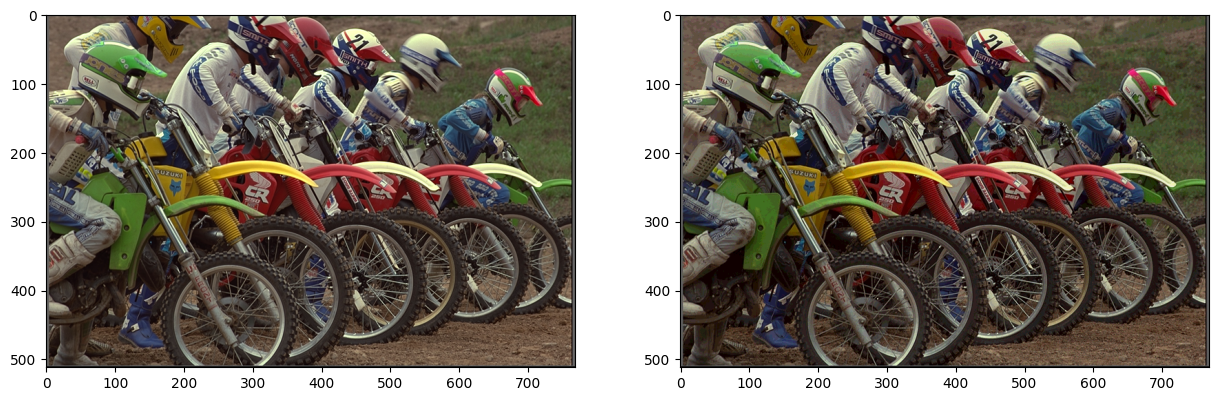

In [7]:
quantized = np.copy(img)
step = 16

# Since we know for loops are slow in python, let's make use of numy power :-)
quantized = (np.floor(quantized/step)*step).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(quantized)

print('Quantized image is', step, 'times smaller.')
print('Original color pallette:', 2**24)
print('Original color pallette:', (2**24)//16)

In [ ]:
plt.imshow(quantized)